In [81]:
import pandas as pd
import json
import numpy as np
import glob
import seaborn as sns
from matplotlib import pyplot as plt
import os

In [30]:
metrics = [str(x) for x in [0.01,0.1, 1.0, 10.0, 100.0, 1000.0]]

In [84]:
hpath = os.path.expanduser('~')

In [85]:
mdict = {}
for m in metrics:
    with open(f'{hpath}/scratch/metrics_tune/triplet_loss_{m}/log.json', 'r') as fh:
        mdict[m] = json.load(fh)

## Accuracy over training example (1 epoch, 4000 examples)

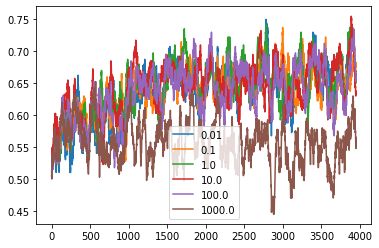

In [86]:
for k in mdict.keys():
    nr_samples = len(mdict[k]['epoch_0']['metrics'])
    mtrs = [np.mean(mdict[k]['epoch_0']['metrics'][i:i+50]) for i in range(nr_samples-50)]
    sns.lineplot(x=range(nr_samples-50), y=mtrs, label=k)
plt.legend()
plt.show()

In [42]:
for k in mdict.keys():
    avg_acc = np.mean(mdict[k]['epoch_0']['metrics'])
    print(f'Average metric: {avg_acc}')
    try:
        avg_test_acc = np.mean(mdict[k]['epoch_0']['test_metrics'])
        print(f'Average test metric: {avg_test_acc}')
    except:
        print('No test.')

Average metric: 0.6336875
No test.
Average metric: 0.6373125
No test.
Average metric: 0.6429375
No test.
Average metric: 0.64228125
No test.
Average metric: 0.63496875
Average test metric: 0.6444939323521818
Average metric: 0.55615625
Average test metric: 0.563290730699716


## Distribution of performance metrics

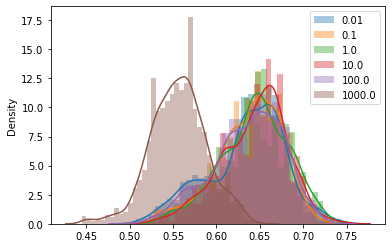

In [87]:
for k in mdict.keys():
    nr_samples = len(mdict[k]['epoch_0']['metrics'])
    mtrs = [np.mean(mdict[k]['epoch_0']['metrics'][i:i+50]) for i in range(nr_samples-50)]
    sns.distplot(mtrs, label=k)
plt.legend()
plt.show()

## Plot distances between anchor/neg/pos

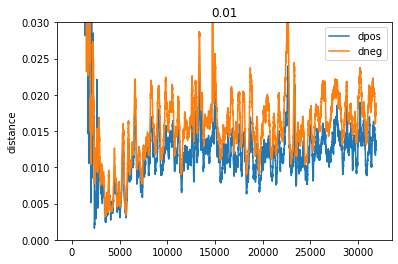

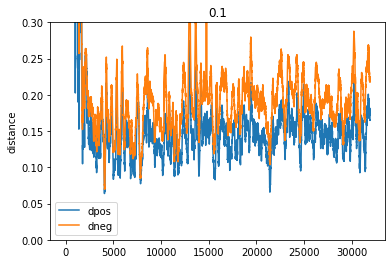

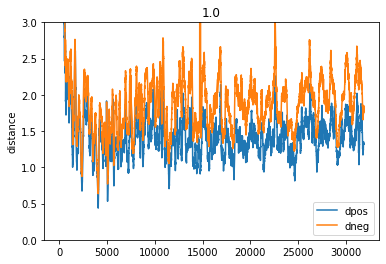

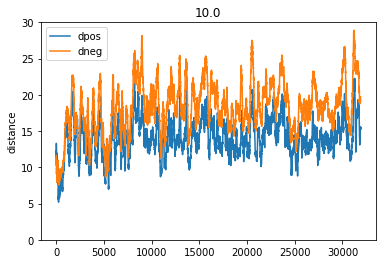

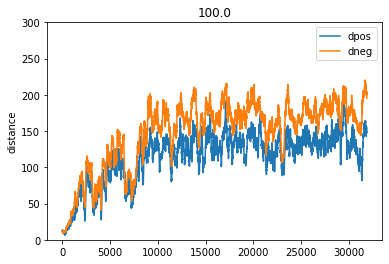

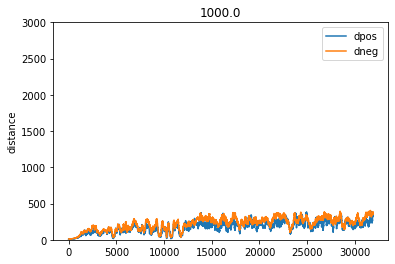

In [88]:
for k in mdict.keys():
    dps = [float(x) for x in mdict[k]['epoch_0']['dp']]
    dns = [float(x) for x in mdict[k]['epoch_0']['dn']]
    dp_mtrs = [np.mean(dps[i:i+100]) for i in range(len(dps)-100)]
    dn_mtrs = [np.mean(dns[i:i+100]) for i in range(len(dps)-100)]
    sns.lineplot(x=range(len(dp_mtrs)), y=dp_mtrs, label='dpos')
    sns.lineplot(x=range(len(dn_mtrs)), y=dn_mtrs, label='dneg')
    plt.ylim(0, float(k)*3)
    plt.ylabel('distance')
    plt.title(k)
    plt.legend()
    plt.show()

## Loss

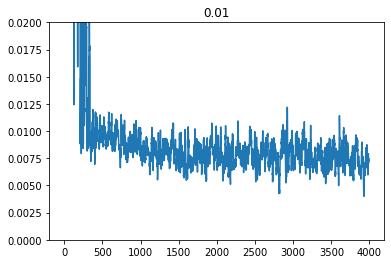

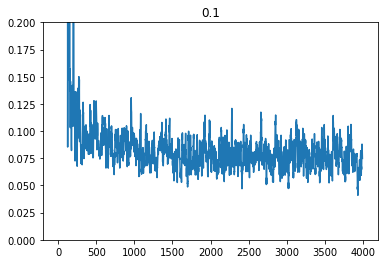

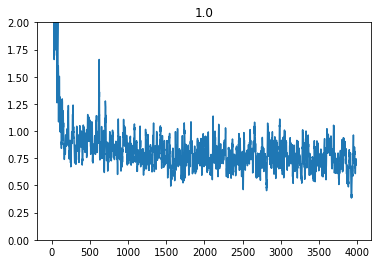

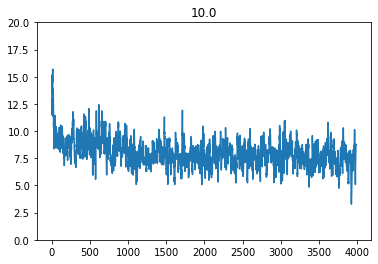

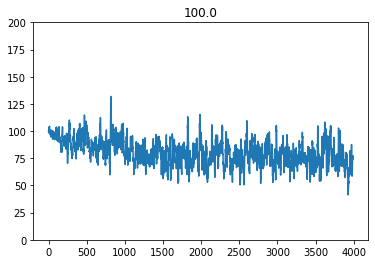

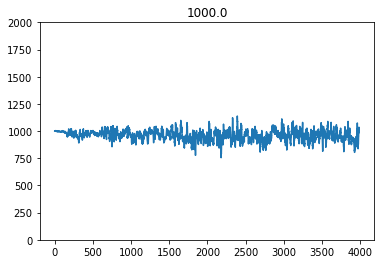

In [91]:
for k in mdict.keys():
    dps = [float(x) for x in mdict[k]['epoch_0']['losses']]
    dp_mtrs = [np.mean(dps[i:i+10]) for i in range(len(dps)-10)]
    sns.lineplot(x=range(len(dp_mtrs)), y=dp_mtrs)
    plt.ylim(0, float(k)*2)
    plt.title(k)
    plt.show()

## Viz margin=0.1 (tuned for longer epoch)

In [96]:
with open('metrics_tune/triplet_loss_0.1/log.json', 'r') as fh:
    m_2 = json.load(fh)

In [97]:
metrics = mdict['0.1']['epoch_0']['metrics'] + m_2['epoch_0']['metrics']
losses = mdict['0.1']['epoch_0']['losses'] + m_2['epoch_0']['losses']
dps = mdict['0.1']['epoch_0']['dp'] + m_2['epoch_0']['dp']
dns = mdict['0.1']['epoch_0']['dn'] + m_2['epoch_0']['dn']

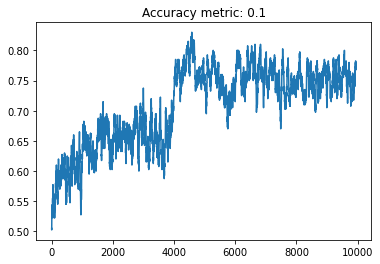

In [118]:
dp_mtrs = [np.mean(metrics[i:i+50]) for i in range(len(metrics)-50)]
sns.lineplot(x=range(len(dp_mtrs)), y=dp_mtrs)
plt.title(f'Accuracy metric: 0.1')
plt.show()

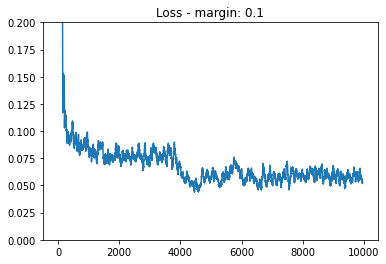

In [115]:
dp_mtrs = [np.mean(losses[i:i+50]) for i in range(len(losses)-50)]
sns.lineplot(x=range(len(dp_mtrs)), y=dp_mtrs)
plt.title(f'Loss - margin: 0.1')
plt.ylim(0,0.2)
plt.show()

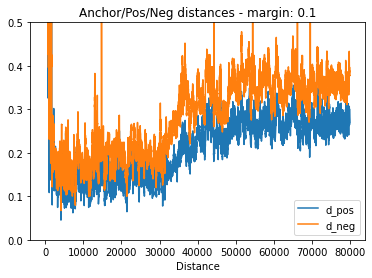

In [116]:
dps = [float(x) for x in dps]
dns = [float(x) for x in dns]
ra_dps = [np.mean(dps[i:i+50]) for i in range(len(dps)-50)]
ra_dns = [np.mean(dns[i:i+50]) for i in range(len(dns)-50)]
sns.lineplot(x=range(len(ra_dps)), y=ra_dps, label='d_pos')
sns.lineplot(x=range(len(ra_dns)), y=ra_dns, label='d_neg')
plt.title('Anchor/Pos/Neg distances - margin: 0.1')
plt.xlabel('Distance')
plt.ylim(0,.5)
plt.show()

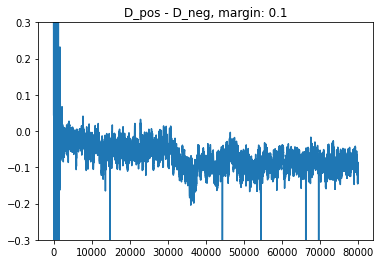

In [117]:
diffs = [d[0]-d[1] for d in zip(dps, dns)]
ra_diffs = [np.mean(diffs[i:i+500]) for i in range(len(diffs)-500)]
sns.lineplot(x=range(len(ra_diffs)), y=ra_diffs)
plt.title(f'D_pos - D_neg, margin: 0.1')
plt.ylim(-.3,.3)
plt.show()

Difference between positive and negative for all margins

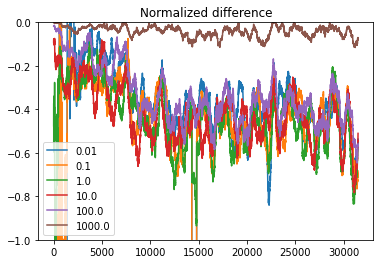

In [128]:
for k in mdict.keys():
    dps = [float(x) for x in mdict[k]['epoch_0']['dp']]
    dns = [float(x) for x in mdict[k]['epoch_0']['dn']]
    diffs = [(d[0]-d[1])/float(k) for d in zip(dps, dns)]
    ra_diffs = [np.mean(diffs[i:i+500]) for i in range(len(diffs)-500)]
    sns.lineplot(x=range(len(ra_diffs)), y=ra_diffs, label=k)
plt.title('Normalized difference')
plt.ylim(-1,0)
plt.legend()
plt.show()